# Random Forest Tree of Adult Data

Developers: Danielle Shackley, Brendan Dao
Principals of Machine Learning Final Project
Description: This script uses the 'adult' data csv file to create a random forest decision tree and plots the feature importance. The data is transformed into numerical values with a labelEncoder function. 

In [1]:
#!pip install mglearn
#!pip install graphviz
#sudo apt-get install graphviz
#!pip install sklearn
!pip install XGBoost

You should consider upgrading via the 'c:\users\shackleyd\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import mglearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import *
import matplotlib.pyplot as plt
import pandas as pd
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

# Random Forest Tree

### Loading data set


In [3]:
df=pd.read_csv("adult.csv")
df

In [4]:
X=df.iloc[:,0:14]
y=df.iloc[:,-1]
#np.array(headers)
headers = np.array(list(df.columns[:-1].T))

In [5]:
# Converting data to numerical
# Import LabelEncoder
from sklearn import preprocessing
#creating labelEncoder
le = preprocessing.LabelEncoder()
# Converting string labels into numbers.
y=le.fit_transform(y)
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X=enc.fit_transform(X)
X.shape

(32561, 14)

In [6]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train[:,[0,1]], y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

In [7]:
array2=X_train[:,[0,1]]
array2
y_train.shape

(24420,)

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 14 features as input.

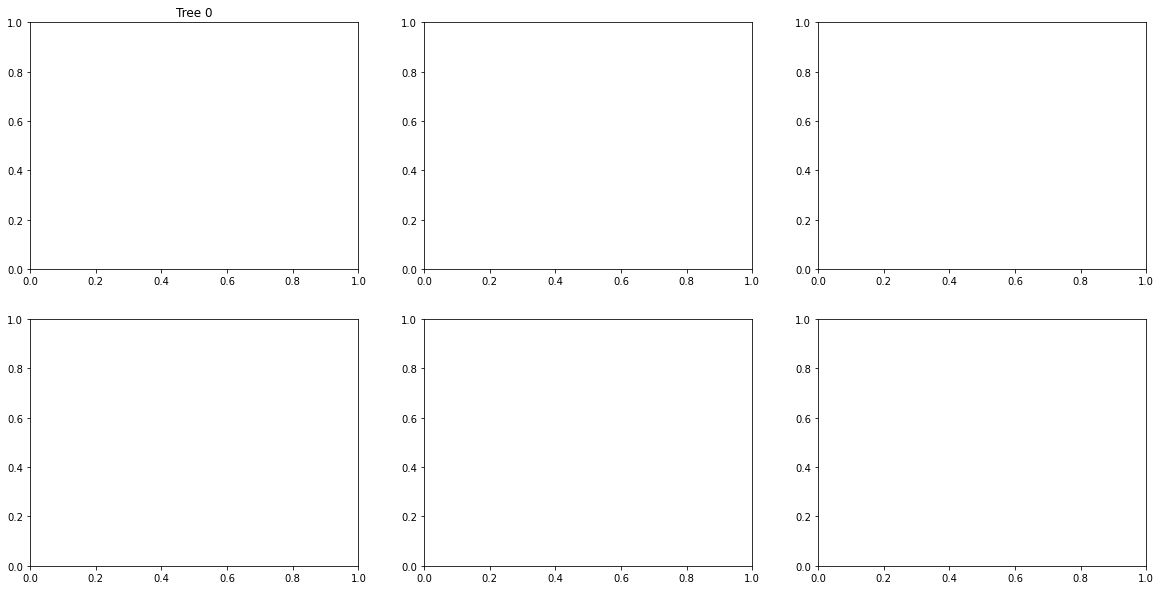

In [8]:
#Visualization
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
  ax.set_title("Tree {}".format(i))
  mglearn.plots.plot_tree_partition(X_train[:,[0,1]], y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train[:,[0,1]], fill=True, ax=axes[-1, -1],alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [ ]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train[:,[0,1]], y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test[:,[0,1]], y_test)))

In [ ]:
def plot_feature_importances_cancer(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), (list(df.columns[:-1].T)))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

In [ ]:
plot_feature_importances_cancer(forest)